# Task 2 : K-Means Clustering
### Level 2 - Machine Learning Internship

**Objective:**
Implement K-Means clustering to group unlabeled data into clusters.

In [10]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [11]:
# 2. Load Dataset
df = pd.read_csv('1) iris.csv')

print("Shape:", df.shape)
df.head()

Shape: (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
# 3. Select Features (Exclude Label)

# Drop species column since K-Means is unsupervised
X = df.drop("species", axis=1)

print("Feature Matrix Shape:", X.shape)

Feature Matrix Shape: (150, 4)


In [13]:
# 4. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

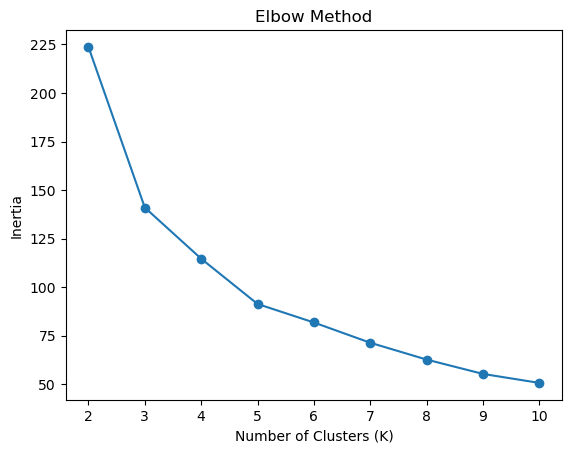

In [14]:
# 5. Elbow Method (Inertia)
inertias = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    
plt.figure()
plt.plot(list(k_values), inertias, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

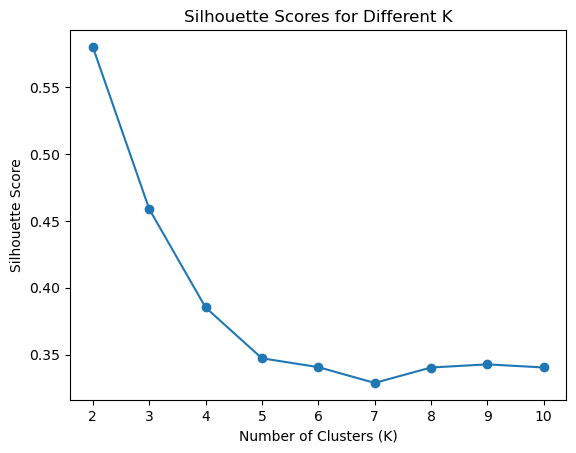

Best K by Silhouette = 2 (score=0.580)


In [15]:
# 6. Silhouette Analysis
sil_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure()
plt.plot(list(k_values), sil_scores, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different K")
plt.show()

best_k = list(k_values)[int(np.argmax(sil_scores))]
best_sil = max(sil_scores)

print(f"Best K by Silhouette = {best_k} (score={best_sil:.3f})")

In [16]:
# 7. Train Final K-Means Model
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_scaled)

df["Cluster"] = clusters

print("\nCluster Count:")
df["Cluster"].value_counts()


Cluster Count:


Cluster
0    100
1     50
Name: count, dtype: int64

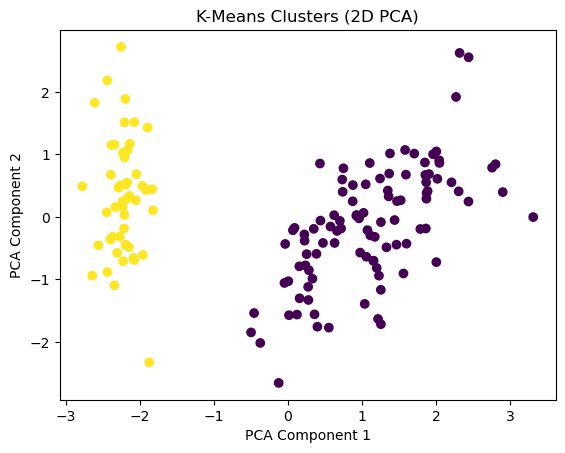

In [17]:
# 8. PCA for 2D Visualization
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clusters (2D PCA)")
plt.show()

In [18]:
# 9. Cluster Interpretation (Feature Means)
cluster_summary = df.groupby("Cluster")[X.columns].mean()

print("Cluster Feature Means:")
cluster_summary

Cluster Feature Means:


,sepal_length,sepal_width,petal_length,petal_width
Cluster,,,,
0,6.262,2.872,4.906,1.676
1,5.006,3.418,1.464,0.244
